# One Belt One Road Global Investment Data Analyzation
Using data gained from the China Global Investment Tracker, which has been compiled by The American Enterprise Institute and The Heritage Foundation. This information has been updated as of 2020. This notebook is a base work on research and understanding of the data.

In [64]:
#importing the libraries
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
import sklearn.metrics
import sklearn.model_selection as ms

In [3]:
df = pd.read_excel("dataset1and2.xlsx",engine="openpyxl")
print(df.head())
print(df.keys())

   Year     Month             Chinese Entity  Quantity in Millions Share size  \
0  2005   January                  Minmetals                   500        NaN   
1  2005   January  China Academy of Sciences                  1740        NaN   
2  2005   January                  Sinohydro                   100        NaN   
3  2005  February                  Minmetals                   550        NaN   
4  2005  February                  Sinohydro                   150        NaN   

          Transaction Party      Sector Subsector Country  \
0              Cubapetroleo      Metals       NaN    Cuba   
1                       IBM  Technology       NaN     USA   
2                       NaN   Transport  Aviation   Qatar   
3                   Codelco      Metals    Copper   Chile   
4  Oman Wastewater Services   Utilities       NaN    Oman   

                              Region  BRI Greenfield  
0                      North America  NaN          G  
1                                USA

## Indexes
Note the index names: 'Year', 'Month', 'Chinese Entity', 'Quantity in Millions', 'Share size',
       'Transaction Party', 'Sector', 'Subsector', 'Country', 'Region', 'BRI',
       'Greenfield'

In [4]:
#Convert and locate the uniques
df.columns = [c.lower().replace(' ', '_') for c in df.columns]
years = df.year.unique()
chinese_entity = df.chinese_entity.unique()
regions = df.region.unique()
qinmillions = df.quantity_in_millions.unique()
share_size = df.share_size.unique()
tparty = df.transaction_party.unique()
sector = df.sector.unique()
subsector = df.subsector.unique()
country = df.country.unique()
regions = df.region.unique()
bri = df.bri.unique()
greenfield = df.greenfield.unique()

uniques = [years, chinese_entity, regions, qinmillions, share_size,
           tparty, sector, subsector, country, regions, bri, greenfield]

In [5]:
for x in uniques:
    print(x)

[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020]
['Minmetals' 'China Academy of Sciences' 'Sinohydro' 'MCC' 'Sinoma'
 'CNOOC' 'Sinomach' 'Minmetals, MCC' 'CNPC' 'Sinopec'
 'Sinomach, Sinohydro' 'China Railway Construction, Genertec'
 'Jiangsu Yuejin' 'CITIC, Sinohydro' 'CNPC, Sinopec'
 'State-Owned Enterprise Investment Company, Beijing Jingdeshun'
 'ChemChina' 'Sinosteel' 'China Nonferrous'
 'China Communications Construction' 'Norinco' 'CITIC'
 'CITIC, China Aluminum' 'China National Nuclear'
 'State Construction Engineering' 'Group of Shanghai state firms'
 'Shandong Electric Power' 'China Power Energy Consulting'
 'CITIC, China Railway Construction' 'Tebian Electric Apparatus' 'Weihai'
 'Jiangsu International' 'Dongfang Electric' 'Wuxi Suntech'
 'ZTE, Huawei, China Communications Construction' 'Huawei'
 'CITIC, Chinalco' 'Jiangxi Copper' 'China Development Bank' 'Ex-Im Bank'
 'Three Gorges' 'China National Chemical Engineering' 'Genertec'
 'Sichuan

### Chinese Company Number
Note the large amount of Chinese companies. This will make it extremely hard to make comparisons. The companies should be split into groups (bins) based on the amount of investments/number of investments.

In [6]:
for x in regions:
    print(x + " is:")
    print(df[df.region == x].country.unique())

North America is:
['Cuba' 'Canada' 'Mexico' 'Trinidad-Tobago' 'Costa Rica' 'Bahamas'
 'Jamaica' 'Guatemala' 'Nicaragua' 'Honduras' 'Antigua and Barbuda'
 'Panama' 'Barbados']
USA is:
['USA']
Arab Middle East and North Africa is:
['Qatar' 'Oman' 'Saudi Arabia' 'Sudan' 'Algeria' 'Mauritania' 'Syria'
 'UAE' 'Yemen' 'Egypt' 'Kuwait' 'Jordan' 'Iraq' 'Libya' 'Morocco'
 'Tunisia' 'Bahrain']
South America is:
['Chile' 'Ecuador' 'Brazil' 'Venezuela' 'Colombia' 'Peru' 'Guyana'
 'Argentina' 'Bolivia']
East Asia is:
['Papua New Guinea' 'Indonesia' 'Myanmar' 'Mongolia' 'Laos' 'Cambodia'
 'Vietnam' 'Japan' 'Singapore' 'Philippines' 'Malaysia' 'Fiji' 'Thailand'
 'Brunei' 'South Korea' 'North Korea' 'New Zealand' 'Taiwan' 'Timor-Leste'
 'Samoa' 'Solomon Islands']
West Asia is:
['Turkey' 'Kazakhstan' 'Iran' 'Pakistan' 'Sri Lanka' 'Russian Federation'
 'India' 'Tajikistan' 'Turkmenistan' 'Uzbekistan' 'Azerbaijan'
 'Afghanistan' 'Georgia' 'Bangladesh' 'Nepal' 'Kyrgyzstan' 'Maldives']
Europe is:
['Britain

Note that USA is placed as it's own region. It may be good to change this before working further with the data.

In [7]:
region_averages = {}

for x in regions:
    regional_average = int(df[df.region == x].quantity_in_millions.mean())
    region_averages[x] = regional_average
    
print(region_averages)

{'North America': 613, 'USA': 652, 'Arab Middle East and North Africa': 541, 'South America': 775, 'East Asia': 462, 'West Asia': 574, 'Europe': 803, 'Australia': 585, 'Sub-Saharan Africa': 503}


In [8]:
country_averages = {}

for x in country:
    country_average = int(df[df.country == x].quantity_in_millions.mean())
    country_averages[x] = country_average

values = list(country_averages.values())
keys = list(country_averages.keys())
df2 = pd.DataFrame({'Country' : keys, 'Averages' : values})
print(df2)

             Country  Averages
0               Cuba       246
1                USA       652
2              Qatar       390
3              Chile      1233
4               Oman       551
..               ...       ...
148            Samoa       110
149          Moldova       280
150          Lesotho       100
151          Bahrain       710
152  Solomon Islands       200

[153 rows x 2 columns]


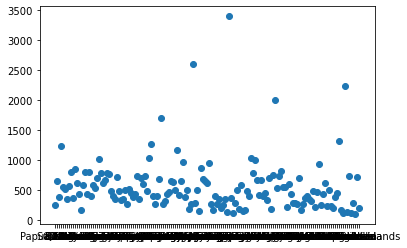

In [9]:
plt.scatter(df2.Country, df2.Averages)

### Outliers
Major obvious outliers show that data could easily end up skewed. Let's identify them in the following section.

In [10]:
df2_outliers = df2[df2.Averages > 2000]
print(df2_outliers)

         Country  Averages
69         Libya      2600
87   Switzerland      3400
145      Finland      2238


### Using Quantity / Number of investments
It may be better to use Quantity / Number of investments, or else simply use total investments (or total per year).

In [11]:
#Compute totals
totals = {}
for x in df.country:
    totalx = 0
    for y in df[df.country == x].quantity_in_millions:
        totalx += y
    totals[x] = totalx

df3 = pd.DataFrame({'Country' : list(totals.keys()), 'Total' : list(totals.values())})
print(df3)

             Country   Total
0               Cuba     740
1                USA  189280
2              Qatar    7800
3              Chile   14800
4               Oman    6620
..               ...     ...
148            Samoa     110
149          Moldova     560
150          Lesotho     100
151          Bahrain    1420
152  Solomon Islands     200

[153 rows x 2 columns]


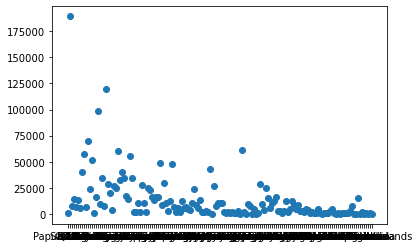

In [12]:
#Plot totals
plt.scatter(df3.Country,df3.Total)

In [13]:
#Find average total
print(df3.Total.mean())

13696.013071895424


(array([122.,  17.,   7.,   4.,   0.,   1.,   1.,   0.,   0.,   1.]),
 array([1.00000e+02, 1.90180e+04, 3.79360e+04, 5.68540e+04, 7.57720e+04,
        9.46900e+04, 1.13608e+05, 1.32526e+05, 1.51444e+05, 1.70362e+05,
        1.89280e+05]),
 <a list of 10 Patch objects>)

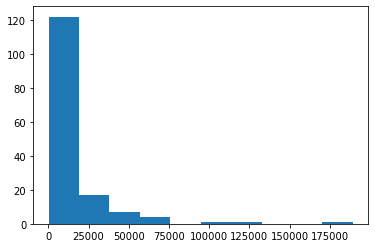

In [14]:
plt.hist(df3.Total,bins=10)

### Inequality in investments
From the prior total graphs it remains obvious that there is gigantic inequality in the amount invested per country. This only confirms that greater information may be gained in comparing it to GDP. 

Inequality in investment does not mean anything in and of itself, but paying attention to which countries are most invested in, and separating a major group of those strong outliers may be a good investigation of OBOR movements.

Comparing the GDP to investments and finding the major players in that (as in, those where the OBOR investments / GDP are the highest) may show some indication in the nations that China is seeking for the most trade and political weight. This could be additionally interesting in developing countries where China is taking great moves to improve the development and the infrastructure.

The data that is being used includes a construction sheet. Using this in those developing countries (say the lowest one or two bins of the GDP data once it is constructed) may also be a good indication of this).

#### Next Steps
The GDP data for the test series to see if there is correlation should be completed, even though ideally all GDP data should be finalized before moving on. As this is having to be pulled manually, it may take a few days to complete.

# Introducing GDP into the equation
GDP file has been completed. Time to upload it and split it into Bins.

In [15]:
df4 = pd.read_excel("countryvgdp.xlsx", engine = "openpyxl", index_col = 'country')

In [16]:
print(df4.head())

             2005      2006      2007      2008      2009      2010      2011  \
country                                                                         
Cuba        42.64     52.74     58.60     60.81     62.08     64.38     68.99   
USA      13036.64  13814.61  14451.86  14712.85  14448.93  14992.05  15542.58   
Qatar       44.53     60.88     79.71    115.27     97.80    125.12    167.73   
Chile      123.00    154.80    173.60    179.60    172.40    218.50    252.30   
Oman        31.08     37.22     42.09     60.91     48.39     57.05     68.02   

             2012      2013      2014      2015      2016      2017      2018  \
country                                                                         
Cuba        73.14     77.15     80.65     87.13     91.37     96.85    100.02   
USA      16197.01  16784.85  17527.26  18238.30  18745.08  19542.98  20611.86   
Qatar      186.83    198.73    206.22     61.74     51.73    166.93    191.36   
Chile      267.10    278.40

### Transposing table
As the table needs to be used for means of each years in order to create bins, it will be simpler to work with transposed.

In [17]:
df5 = df4.T

In [18]:
df5.drop(df5.index[15])

country,Cuba,USA,Qatar,Chile,Oman,Ecuador,Papua New Guinea,Saudi Arabia,Canada,Sudan,...,Barbados,Latvia,Finland,Cape Verde,Slovenia,Samoa,Moldova,Lesotho,Bahrain,Solomon Islands
2005,42.64,13036.64,44.53,123.0,31.08,41.51,4.87,328.46,1169.36,26.52,...,3.90,16.91,204.81,0.97,36.21,0.47,2.99,1.68,15.97,0.41
2006,52.74,13814.61,60.88,154.8,37.22,46.80,8.31,376.90,1315.42,35.82,...,4.22,21.44,216.91,1.11,39.48,0.51,3.41,1.80,18.50,0.46
2007,58.60,14451.86,79.71,173.6,42.09,51.01,9.55,415.96,1464.98,45.90,...,4.67,30.90,256.05,1.51,48.01,0.57,4.40,1.72,21.73,0.52
2008,60.81,14712.85,115.27,179.6,60.91,61.76,11.67,519.80,1549.13,54.53,...,4.78,35.66,284.55,1.79,55.55,0.62,6.05,1.76,25.71,0.61
2009,62.08,14448.93,97.80,172.4,48.39,62.52,11.62,429.10,1371.15,49.96,...,4.47,26.25,252.50,1.71,50.37,0.58,5.44,1.77,22.94,0.60
2010,64.38,14992.05,125.12,218.5,57.05,69.56,14.25,528.21,1613.46,61.74,...,4.53,23.80,249.18,1.66,48.16,0.66,6.97,2.27,25.71,0.68
2011,68.99,15542.58,167.73,252.3,68.02,79.28,17.98,671.24,1788.65,57.89,...,4.66,28.49,275.24,1.86,51.51,0.74,8.41,2.62,28.78,0.93
2012,73.14,16197.01,186.83,267.1,76.62,87.92,21.30,735.97,1828.69,52.77,...,4.61,28.18,258.30,1.75,46.58,0.76,8.71,2.53,30.75,1.06
2013,77.15,16784.85,198.73,278.4,78.78,95.13,21.26,746.65,1847.21,57.73,...,4.68,30.27,271.29,1.85,48.40,0.77,9.50,2.42,32.54,1.13
2014,80.65,17527.26,206.22,260.5,81.08,101.73,23.21,756.35,1803.53,64.94,...,4.70,31.38,274.50,1.86,49.93,0.76,9.51,2.50,33.39,1.17


Now that data is cleaned we can calculate means split it into bins.

In [19]:
means = []
for x in df5.columns:
    means.append(df5[x].mean())

In [20]:
df4['meangdp'] = means

In [21]:
df4 = df4.drop(columns='Unnamed: 16', axis=1)

(array([152.,   0.,   1.]),
 array([2.69333333e-01, 5.55729200e+03, 1.11143147e+04, 1.66713373e+04]),
 <a list of 3 Patch objects>)

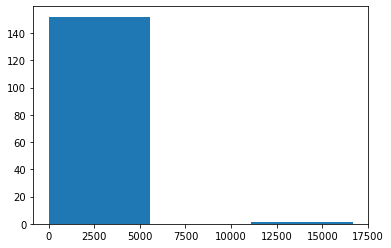

In [22]:
plt.hist(df4.meangdp, bins=3)

### The US being an obvious strong outlier makes this extremely difficult.
This will be moved to excel temporarily to look more exact into the data. There will have to be a different method of splitting the data.

In [23]:
df4.to_excel("datavgdpwithmean.xlsx", engine="openpyxl")

Created pivot table of country vs meangdp for easy viewing, reordered means from smalles to largest.
Range falles between 0.27 and 16671. 
0 - 10 = 28 countries
10.01 - 20 = 27 countries
20.01 - 40 = 25 countries
40.01 - 100 = 25 countries
100 - 300 = 25 countries
300 - 1000 = 19 countries
1000 - 3000 = 10 countries
300 + = 2 countries

1000 plus are standard "Large Economy" nations. The list includes Mexico, Australia, South Korea, Spain, Russia, Canada, India, Brazil, Italy, France, Britain, Germany, Japan, and the USA (from smallest to lowest).

If split in that order it gives us 8 seperate groups.

The groups could be further split into groups with a mean under 100, those with a mean under 1000, and those with a mean under 20000, showing large breaches in the type of nation.

It should be noted that some groups in the 100 - 1000 group are still major economies such as Turkey, Sweden, and Taiwan.

## Listing the country groups

In [24]:
group1 = df4[df4['meangdp'] <= 100].index
group2 = df4[(df4['meangdp'] <= 1000) & (df4['meangdp'] > 100)].index
group3 = df4[df4['meangdp'] > 1000].index

#creating the minor groups
mgroup1 = df4[df4['meangdp'] <= 10].index
mgroup2 = df4[(df4['meangdp'] <= 20) & (df4['meangdp'] > 10)].index
mgroup3 = df4[(df4['meangdp'] <= 40) & (df4['meangdp'] > 20)].index
mgroup4 = df4[(df4['meangdp'] <= 100) & (df4['meangdp'] > 40)].index
mgroup5 = df4[(df4['meangdp'] <= 300) & (df4['meangdp'] > 100)].index
mgroup6 = df4[(df4['meangdp'] <= 1000) & (df4['meangdp'] > 300)].index
mgroup7 = df4[(df4['meangdp'] <= 3000) & (df4['meangdp'] > 1000)].index
mgroup8 = df4[df4['meangdp'] > 3000].index


In [25]:
groups = [group1, group2, group3, mgroup1, mgroup2, mgroup3, mgroup4, mgroup5, mgroup6, mgroup7, mgroup8]

for x in range(0,3):
    grouptxt = "Group " + str(x + 1) + " is: "
    for y in groups[x]:
        grouptxt = grouptxt + (str(y)) + ", "
    print(grouptxt[:-2])
    print("")

print("")

for x in range(3,11):
    grouptxt = "Minor Group " + str(x + 1) + " is: "
    for y in groups[x]:
        grouptxt = grouptxt + (str(y)) + ", "
    print(grouptxt[:-2])
    print("")

Group 1 is: Cuba, Oman, Ecuador, Papua New Guinea, Sudan, Mauritania, Myanmar, Mongolia, Laos, Syria, Angola, Cambodia, Sri Lanka, Yemen, Congo, Botswana, Ethiopia, Zambia, Democratic Republic of the Congo, Chad, Equatorial Guinea, Ghana, Turkmenistan, Uzbekistan, Azerbaijan, Tanzania, Jordan, Afghanistan, Zimbabwe, Niger, Belarus, Georgia, Trinidad-Tobago, Libya, Morocco, Cyprus, Mozambique, Gabon, Liberia, Mali, Costa Rica, Madagascar, Togo, Guyana, Fiji, Mauritius, Tunisia, Bahamas, Senegal, Bulgaria, Cameroon, Brunei, Sierra Leone, Serbia, Kenya, Jamaica, Bosnia, Guatemala, Nepal, North Korea, Kyrgyzstan, Guinea, South Sudan, Uganda, Benin, Djibouti, Bolivia, Nicaragua, Rwanda, Malawi, Ivory Coast, Honduras, Sao Tome, Macedonia, Namibia, Luxembourg, Eritrea, Malta, Montenegro, Guinea-Bissau, Antigua and Barbuda, Croatia, Maldives, Timor-Leste, Panama, Barbados, Latvia, Cape Verde, Slovenia, Samoa, Moldova, Lesotho, Bahrain, Solomon Islands

Group 2 is: Qatar, Chile, Saudi Arabia, A

### Next steps
Next we just need to calculate the invested vs gdp and then compare the differences based on the groups. For this an average for each group may work.
We could also simply graph one vs the other.

# Averages 

In [26]:
#Must create a dataframe with the gdp means and investment totals
df3['meangdp'] = means

In [27]:
df3.head()

,Country,Total,meangdp
0,Cuba,740,72.610714
1,USA,189280,16671.337333
2,Qatar,7800,129.199333
3,Chile,14800,225.473333
4,Oman,6620,62.798667


In [29]:
totals = df3['Total']

In [43]:
df6 = pd.DataFrame({'Country' : country, 'TotalInvestment' : totals, 'MeanGDP' : means})

In [44]:
print(df6.head())

  Country  TotalInvestment       MeanGDP
0    Cuba              740     72.610714
1     USA           189280  16671.337333
2   Qatar             7800    129.199333
3   Chile            14800    225.473333
4    Oman             6620     62.798667


In [45]:
df6 = df6.set_index(df6.Country)

In [46]:
df6 = df6.drop(['Country'], axis=1)

In [47]:
print(df6.head())

         TotalInvestment       MeanGDP
Country                               
Cuba                 740     72.610714
USA               189280  16671.337333
Qatar               7800    129.199333
Chile              14800    225.473333
Oman                6620     62.798667


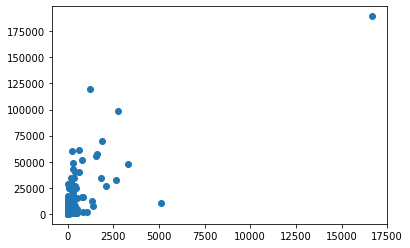

In [49]:
plt.scatter(df6['MeanGDP'],df6['TotalInvestment'])

### Relationship does not seem to be linear. It may be useful to eleminate the US for better viewing.

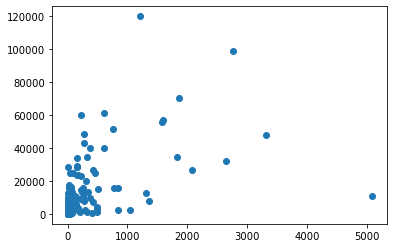

In [53]:
df7 = df6.drop('USA', axis=0)
plt.scatter(df7['MeanGDP'],df7['TotalInvestment'])

While there does appear to be a relationship of sorts, the noise may be too blatant for actual comparison. I will try using groups, but this does present the fear of forcing a relevance where one does not exist.

In [58]:
x = df6[['MeanGDP']]
y = df6['TotalInvestment']
reg = lr().fit(x,y)

In [61]:
print(reg.coef_)
print(reg.intercept_)

[11.4051084]
9082.76569001899


Lets try again with test and predictions.

In [68]:
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.33, random_state = 10)

In [73]:
model = lr().fit(x_train,y_train)

print("prediction:")
print(model.predict(x_test))
print("score:")
print(model.score(x_test,y_test))

prediction:
[ 39889.25904697   7272.87340481   9799.50537041  10371.83457009
   8904.21990931   7603.83563591   6908.84703026  51876.2948123
  14671.88645776   6541.46623809   7229.39382953   7240.13354498
  12747.89897955  87635.41409636 413456.29933236   9708.88495323
  36027.12719291   6638.20503862 130778.2667473   12574.1922183
   8901.43734667  14222.01442264   7860.38465679   6896.60910126
   6968.48383329   6791.9782371    6922.530869    18392.35170166
   6720.88457529  10566.20714744   9688.44694928   6819.54350676
   6594.28611135   6800.0167514    6872.8352766    7166.45258808
   7102.7790933   15493.49096195  13514.40548903   7715.15441378
   7703.682445     6800.89545539  71037.72085473  21477.38378145
  10545.89932186  12169.98838229   6600.30686092  51076.34873427
   7771.78200433   6559.28440236  18382.13269968]
score:
-0.5084155979264584


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.